In [16]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
from scipy.io import arff
import pgmpy
from pgmpy.estimators import HillClimbSearch, MmhcEstimator
from pgmpy.estimators import K2Score, BicScore, BDeuScore, BDsScore
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_score, recall_score
import networkx as nx
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from pgmpy.estimators import BayesianEstimator, ExpectationMaximization
from pgmpy.models import BayesianNetwork
from pgmpy.metrics import correlation_score, log_likelihood_score, structure_score
from pgmpy.inference import VariableElimination
from  pgmpy.inference.EliminationOrder import WeightedMinFill

Data using downloaded files

Description of Attributes


X1	net profit / total assets\
X2	total liabilities / total assets\
X3	working capital / total assets\
X4	current assets / short-term liabilities\
X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365\
X6	retained earnings / total assets\
X7	EBIT / total assets\
X8	book value of equity / total liabilities\
X9	sales / total assets\
X10	equity / total assets\
X11	(gross profit + extraordinary items + financial expenses) / total assets\
X12	gross profit / short-term liabilities\
X13	(gross profit + depreciation) / sales\
X14	(gross profit + interest) / total assets\
X15	(total liabilities * 365) / (gross profit + depreciation)\
X16	(gross profit + depreciation) / total liabilities\
X17	total assets / total liabilities\
X18	gross profit / total assets\
X19	gross profit / sales\
X20	(inventory * 365) / sales\
X21	sales (n) / sales (n-1)\
X22	profit on operating activities / total assets\
X23	net profit / sales\
X24	gross profit (in 3 years) / total assets\
X25	(equity - share capital) / total assets\
X26	(net profit + depreciation) / total liabilities\
X27	profit on operating activities / financial expenses\
X28	working capital / fixed assets\
X29	logarithm of total assets\
X30	(total liabilities - cash) / sales\
X31	(gross profit + interest) / sales\
X32	(current liabilities * 365) / cost of products sold\
X33	operating expenses / short-term liabilities\
X34	operating expenses / total liabilities\
X35	profit on sales / total assets\
X36	total sales / total assets\
X37	(current assets - inventories) / long-term liabilities\
X38	constant capital / total assets\
X39	profit on sales / sales\
X40	(current assets - inventory - receivables) / short-term liabilities\
X41	total liabilities / ((profit on operating activities + depreciation) * (12/365))\
X42	profit on operating activities / sales\
X43	rotation receivables + inventory turnover in days\
X44	(receivables * 365) / sales\
X45	net profit / inventory\
X46	(current assets - inventory) / short-term liabilities\
X47	(inventory * 365) / cost of products sold\
X48	EBITDA (profit on operating activities - depreciation) / total assets\
X49	EBITDA (profit on operating activities - depreciation) / sales\
X50	current assets / total liabilities\
X51	short-term liabilities / total assets\
X52	(short-term liabilities * 365) / cost of products sold)\
X53	equity / fixed assets\
X54	constant capital / fixed assets\
X55	working capital\
X56	(sales - cost of products sold) / sales\
X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)\
X58	total costs /total sales\
X59	long-term liabilities / equity\
X60	sales / inventory\
X61	sales / receivables\
X62	(short-term liabilities *365) / sales\
X63	sales / short-term liabilities\
X64	sales / fixed assets\

In [17]:
X: pd.DataFrame
y: pd.DataFrame

arff_file_year_5 = arff.loadarff('PolishBankruptcy/5year.arff')

df = pd.DataFrame(arff_file_year_5[0])
print("data frame")
for i in range(len(df)):
    if df.loc[i, 'class'] == b'0':
        df.loc[i, 'class'] = 0.0
    else:
        df.loc[i, 'class'] = 1.0
#df

data frame


Standardizing Data

In [18]:
data = df.dropna()
scaler = preprocessing.StandardScaler() 
data_scaled = scaler.fit_transform(data)
data_scaled_transposed = data_scaled.transpose()

attribute_names = [
    "X1:net profit / total assets",
    "X2:total liabilities / total assets",
    "X3:working capital / total assets",
    "X4:current assets / short-term liabilities",
    "X5:[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365",
    "X6:retained earnings / total assets",
    "X7:EBIT / total assets",
    "X8:book value of equity / total liabilities",
    "X9:sales / total assets",
    "X10:equity / total assets",
    "X11:(gross profit + extraordinary items + financial expenses) / total assets",
    "X12:gross profit / short-term liabilities",
    "X13:(gross profit + depreciation) / sales",
    "X14:(gross profit + interest) / total assets",
    "X15:(total liabilities * 365) / (gross profit + depreciation)",
    "X16:(gross profit + depreciation) / total liabilities",
    "X17:total assets / total liabilities",
    "X18:gross profit / total assets",
    "X19:gross profit / sales",
    "X20:(inventory * 365) / sales",
    "X21:sales (n) / sales (n-1)",
    "X22:profit on operating activities / total assets",
    "X23:net profit / sales",
    "X24:gross profit (in 3 years) / total assets",
    "X25:(equity - share capital) / total assets",
    "X26:(net profit + depreciation) / total liabilities",
    "X27:profit on operating activities / financial expenses",
    "X28:working capital / fixed assets",
    "X29:logarithm of total assets",
    "X30:(total liabilities - cash) / sales",
    "X31:(gross profit + interest) / sales",
    "X32:(current liabilities * 365) / cost of products sold",
    "X33:operating expenses / short-term liabilities",
    "X34:operating expenses / total liabilities",
    "X35:profit on sales / total assets",
    "X36:total sales / total assets",
    "X37:(current assets - inventories) / long-term liabilities",
    "X38:constant capital / total assets",
    "X39:profit on sales / sales",
    "X40:(current assets - inventory - receivables) / short-term liabilities",
    "X41:total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "X42:profit on operating activities / sales",
    "X43:rotation receivables + inventory turnover in days",
    "X44:(receivables * 365) / sales",
    "X45:net profit / inventory",
    "X46:(current assets - inventory) / short-term liabilities",
    "X47:(inventory * 365) / cost of products sold",
    "X48:EBITDA (profit on operating activities - depreciation) / total assets",
    "X49:EBITDA (profit on operating activities - depreciation) / sales",
    "X50:current assets / total liabilities",
    "X51:short-term liabilities / total assets",
    "X52:(short-term liabilities * 365) / cost of products sold)",
    "X53:equity / fixed assets",
    "X54:constant capital / fixed assets",
    "X55:working capital",
    "X56:(sales - cost of products sold) / sales",
    "X57:(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "X58:total costs /total sales",
    "X59:long-term liabilities / equity",
    "X60:sales / inventory",
    "X61:sales / receivables",
    "X62:(short-term liabilities *365) / sales",
    "X63:sales / short-term liabilities",
    "X64:sales / fixed assets",
    "class"
]

attribute_dict = {}

for i in range(len(data_scaled_transposed)):
    attribute_dict[attribute_names[i]] = data_scaled_transposed[i]

standardisedData = pd.DataFrame(attribute_dict)
#standardisedData

Normalize Data

In [19]:
data
normalizer = preprocessing.Normalizer()
data_normalised = normalizer.fit_transform(data)
data_normalised_transposed = data_normalised.transpose()

normalised_dict = {}

for i in range(len(data_normalised_transposed)):
    normalised_dict[attribute_names[i]] = data_normalised_transposed[i]


normalisedData = pd.DataFrame(normalised_dict)
#normalisedData

Normalised and Standardised data

In [20]:

normalizer = preprocessing.Normalizer()
data_normalised_standardised = normalizer.fit_transform(standardisedData)
data_normalised_standardised_transposed = data_normalised_standardised.transpose()

normalised_standardised_dict = {}

for i in range(len(data_normalised_standardised_transposed)):
    normalised_standardised_dict[attribute_names[i]] = data_normalised_standardised_transposed[i]


normalised_StandardisedData = pd.DataFrame(normalised_standardised_dict)
#normalised_StandardisedData

Data discretization

In [21]:
atttributes = normalised_StandardisedData.columns.values.tolist()

est = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile', subsample=200_000)
est.fit(normalised_StandardisedData)
PreprocessedData_tranformed = est.transform(normalised_StandardisedData).transpose()


for i in range(len(PreprocessedData_tranformed)):
    attribute_dict[atttributes[i]] = PreprocessedData_tranformed[i]

attribute_dict[attribute_names[len(data_scaled_transposed)-1]] = pd.cut(data_scaled_transposed[len(data_scaled_transposed)-1],2,labels=[0,1])
discretizedData = pd.DataFrame(attribute_dict)
    
#discretizedData

Removal of Features

Selecting financial ratio features as per study dine by [Chen and Shimerda 1981] Kung H Chen and Thomas A Shimerda. An empirical analysis of useful
financial ratios. Financial management, pages 51–60, 1981.

Features I need: 

X23	net profit / sales \
X1	net profit / total assets \
X7	EBIT / total assets \
X49	EBITDA (profit on operating activities - depreciation) / sales \
X9	sales / total assets \
X3	working capital / total assets \
X2	total liabilities / total assets \
X59	long-term liabilities / equity \
X6	retained earnings / total assets \
X4	current assets / short-term liabilities \
X51	short-term liabilities / total assets \
X8	book value of equity / total liabilities \







In [22]:
keeping_attributes = [
    "X23:net profit / sales",
    "X1:net profit / total assets",
    "X7:EBIT / total assets",
    "X49:EBITDA (profit on operating activities - depreciation) / sales",
    "X9:sales / total assets",
    "X3:working capital / total assets",
    "X2:total liabilities / total assets",
    "X59:long-term liabilities / equity",
    "X6:retained earnings / total assets",
    "X4:current assets / short-term liabilities",
    "X51:short-term liabilities / total assets",
    "X8:book value of equity / total liabilities",
    "class"
]

#for attribute in discretizedData.columns.values.tolist():
#    if attribute not in keeping_attributes:
#        del discretizedData[attribute]

#discretizedData

Split Data into training and testing

In [23]:
from math import floor

processed_bankrupt = discretizedData.loc[discretizedData["class"] == 1]
processed_nonbunkrupt = discretizedData.loc[discretizedData["class"] == 0]
processed_bankrupt_train = processed_bankrupt[0:(floor(0.75*processed_bankrupt.shape[0]))]
processed_nonbankrupt_train = processed_nonbunkrupt[0:(floor(0.75*processed_nonbunkrupt.shape[0]))]

processed_bankrupt_test = processed_bankrupt[(floor(0.75*processed_bankrupt.shape[0]))+1:processed_bankrupt.shape[0]]
processed_nonbankrupt_test = processed_nonbunkrupt[(floor(0.75*processed_nonbunkrupt.shape[0]))+1:processed_nonbunkrupt.shape[0]]

training_data = pd.concat([processed_nonbankrupt_train,processed_bankrupt_train])
training_data

testing_data = pd.concat([processed_nonbankrupt_test,processed_bankrupt_test])
testing_targets = testing_data["class"]
del testing_data["class"]

testing_evidence_list= []
for i in range(len(testing_data)):
    testing_evidence_dict = {}
    for z in range(len(testing_data.columns.values.tolist())):
        testing_evidence_dict[testing_data.columns.values.tolist()[z]] = testing_data[testing_data.columns.values.tolist()[z]].iloc[i]
    testing_evidence_list.append(testing_evidence_dict)

Bayesian Network stuff

Structure Learning

In [24]:
scoring_method = BicScore(data=training_data)
est = HillClimbSearch(data=training_data, use_cache = True)
estimated_model = est.estimate(
    scoring_method=scoring_method, max_iter=int(1e4))
model = BayesianNetwork(estimated_model.edges())
#print(model.nodes())
#print(model.edges())

  0%|          | 50/10000 [00:10<33:40,  4.93it/s]  


Display Graph

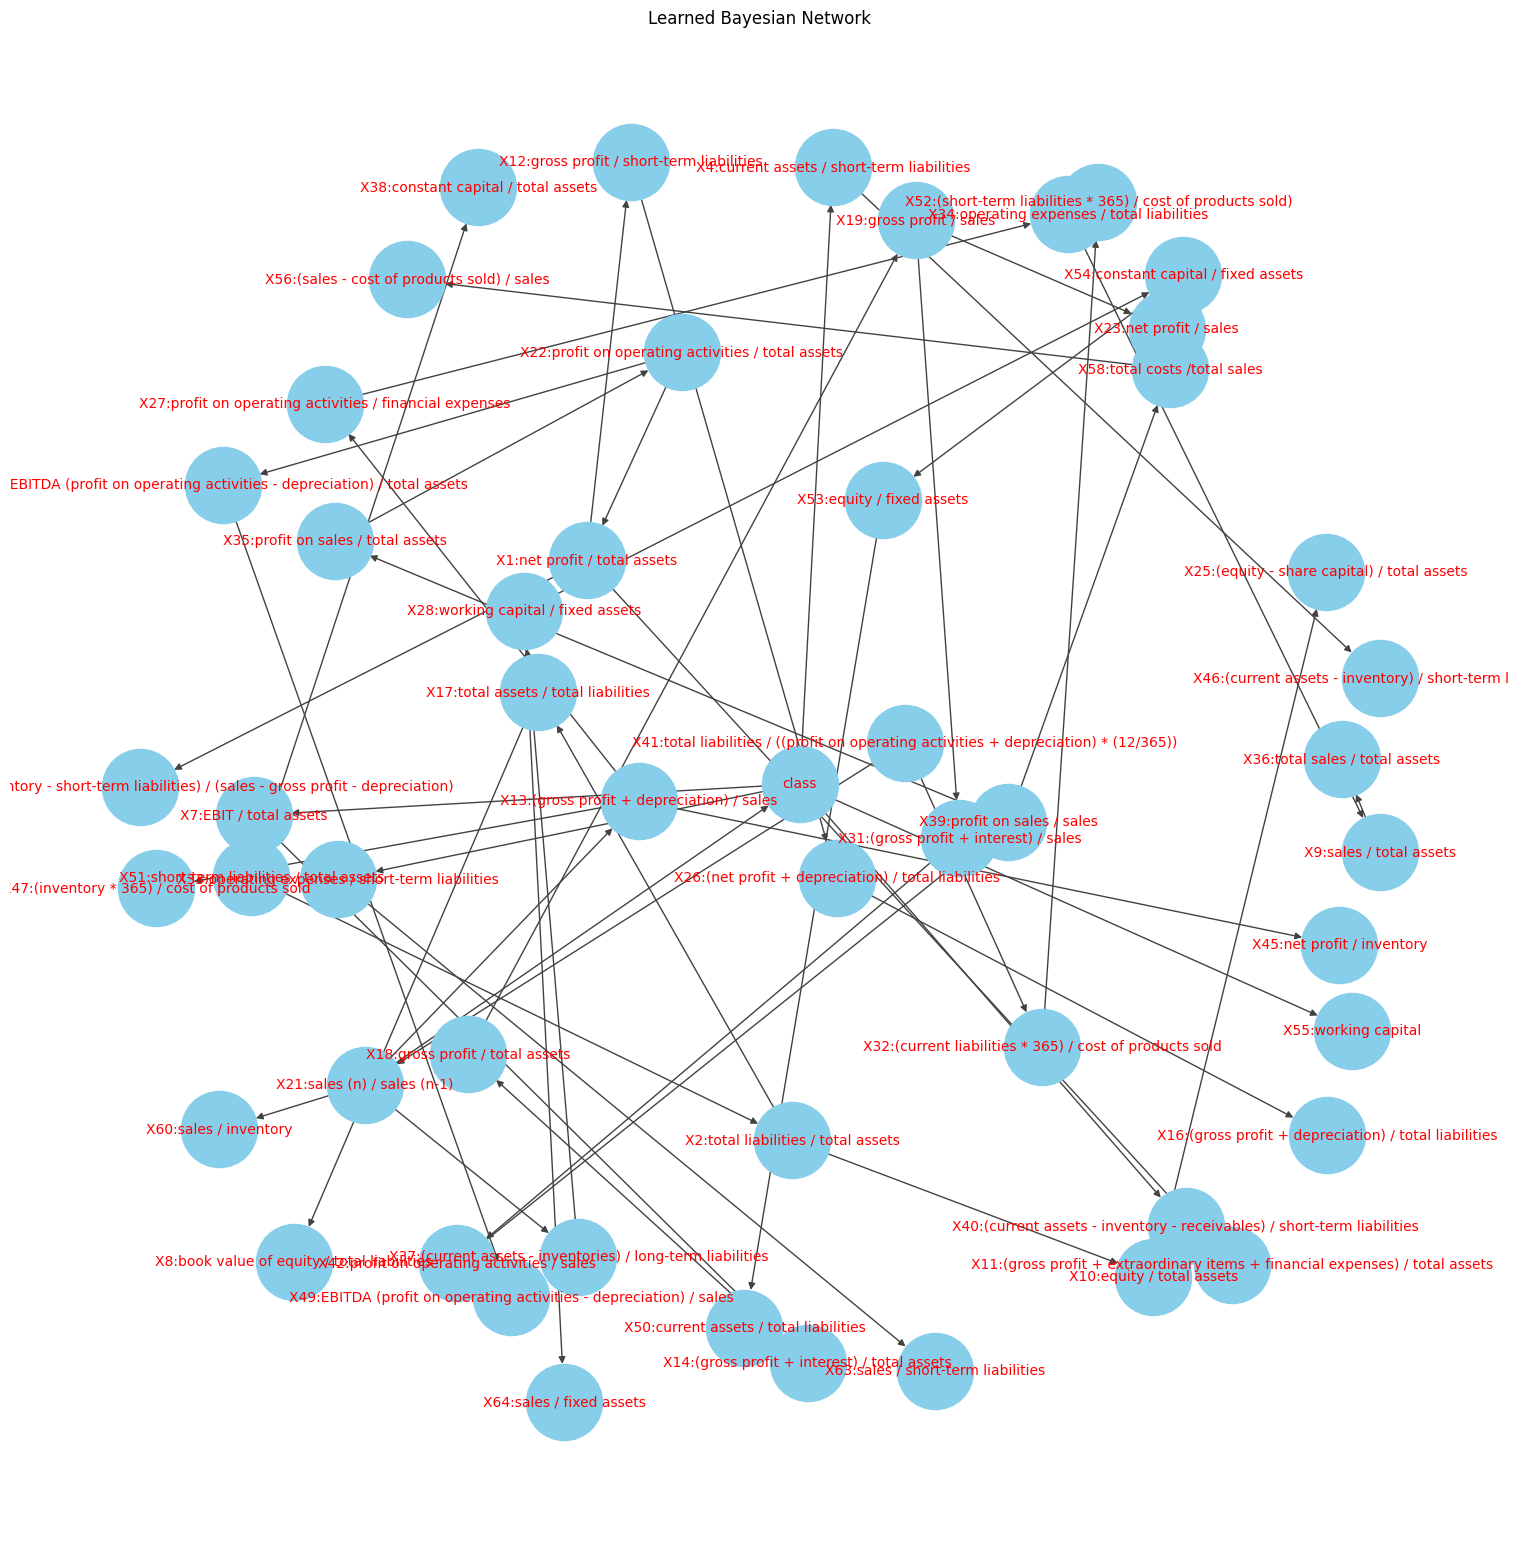

In [47]:
nx_graph = nx.DiGraph(model.edges())
pos = nx.spring_layout(nx_graph,k=1)
plt.figure(figsize=(15, 15))
nx.draw(nx_graph, pos, with_labels=True, node_size=3000, node_color = 'skyblue', edge_color='#424242',font_size=10,font_color='red')
plt.title('Learned Bayesian Network')
plt.show()

Parameter Estimation

In [11]:
estimator = BayesianEstimator(model, training_data)
#cpd_C = estimator.estimate_cpd('class', prior_type="dirichlet", pseudo_counts= 1)
#parameters = estimator.get_parameters(prior_type='dirichlet', pseudo_counts = 1, n_jobs = 6)
parameters = estimator.get_parameters(prior_type='BDeu', equivalent_sample_size=30)

#print(parameters)

for i in range(len(parameters)):
    model.add_cpds(parameters[i])
    
#model.check_model()

Inference

In [12]:
for i in range(len(testing_evidence_list)):
    for attribute in list(testing_evidence_list[i].keys()):
        if attribute not in model.nodes():
            del testing_evidence_list[i][attribute]
            

inference = VariableElimination(model)
elimination_order = WeightedMinFill(model).get_elimination_order(model.nodes())
elimination_order.remove('class')


y_pred = []
y_true = []
for i in range(len(testing_evidence_list)):
    bunkrupt_or_not = inference.map_query(['class'], evidence=testing_evidence_list[i])
    y_pred.append(bunkrupt_or_not['class'])
    y_true.append(testing_targets.iloc[i])

Finding Elimination Order: : 100%|██████████| 52/52 [00:00<00:00, 10404.23it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Ord

Testing Model

In [13]:
data_testing_corr_score = model.simulate(int(1e4))
correlation_score = correlation_score(model, data_testing_corr_score, test="log_likelihood", significance_level=0.05)
log_likelihood_score = log_likelihood_score(model, data_testing_corr_score)
structure_score = structure_score(model, data_testing_corr_score, scoring_method="bic")
print("correlation score: " + str(correlation_score))
print("Log likelihood score: " + str(log_likelihood_score))
print("Structure score: "+ str(structure_score))

accuracy_score = accuracy_score(y_true, y_pred)
f1_score = f1_score(y_true, y_pred)
precision_score = precision_score(y_true, y_pred)
recall_score = recall_score(y_true, y_pred)

print("accuracy score: "+str(accuracy_score))
print("f1_score: "+str(f1_score))
print("precision score: "+str(precision_score))
print("recall score: "+str(recall_score))

Generating for node: X41:total liabilities / ((profit on operating activities + depreciation) * (12/365)):   0%|          | 0/52 [00:00<?, ?it/s]

Generating for node: X21:sales (n) / sales (n-1):   0%|          | 0/52 [00:00<?, ?it/s]                                                         WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
Generating for node: X32:(current liabilities * 365) / cost of products sold:   0%|          | 0/52 [00:00<?, ?it/s]WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
Generating for node: X38:constant capital / total assets:   0%|          | 0/52 [00:00<?, ?it/s]                    WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
Generating for node: X2:total liabilities / total assets:   0%|          | 0/52 [00:00<?, ?it/s]WARNING:pgmpy:Probability values don't exactly sum to 1. Differ by: -2.220446049250313e-16. Adjusting values.
Generating for node: X13:(gross profit + depreciation) / sales:   0%|          | 0/52 [

correlation score: 0.5564738292011019
Log likelihood score: -1014267.4443918557
Structure score: -1084331.0262363148
accuracy score: 0.9669749009247027
f1_score: 0.647887323943662
precision score: 0.5
recall score: 0.92
